## Part II: CrossChatT

### Load required packages

In [45]:
import crosschat as cc
import scanpy as sc

### Load data and preprocess

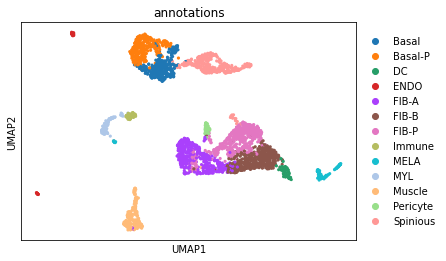

In [46]:
adata = sc.read_h5ad('../src/crosschat/data/mouse_embryo_skin3000.h5ad')
ccT_obj = cc.CrossChatT(adata,species="mouse")
ccT_obj.prepare_adata(normalize=False, scale=True, input='allgenes')
ccT_obj.Draw_annotations_umap()

### Detect trees
Detected trees are ordered by number of nodes in each tree.

In [47]:
ccT_obj.Detect_trees(type='l',tree_size=4, tree_scales=3)
ccT_obj.Detect_trees(type='r', tree_size=3, tree_scales=2)
ccT_obj.Detect_trees(type='lr_union',inclusive_threshold=0.98,disjoint_threshold=0.98,tree_size=4,tree_scales=3)

Parameters:
- `type`: the type of trees to be detected (ligand trees, receptor trees, or ligand-receptor union trees)
- `tree_size`: the number of nodes in the tree must be at least of tree_size
- `tree_scales`: the number of scales in the tree must be at least of tree_scales
- `inclusive_threshold`: a threshold of inclusion of cell groups to allow partial inclusion in trees
- `disjoint_threshold`: a threshold of disjointness of cell groups to allow small amount of overlap in trees

### Draw detected trees

1


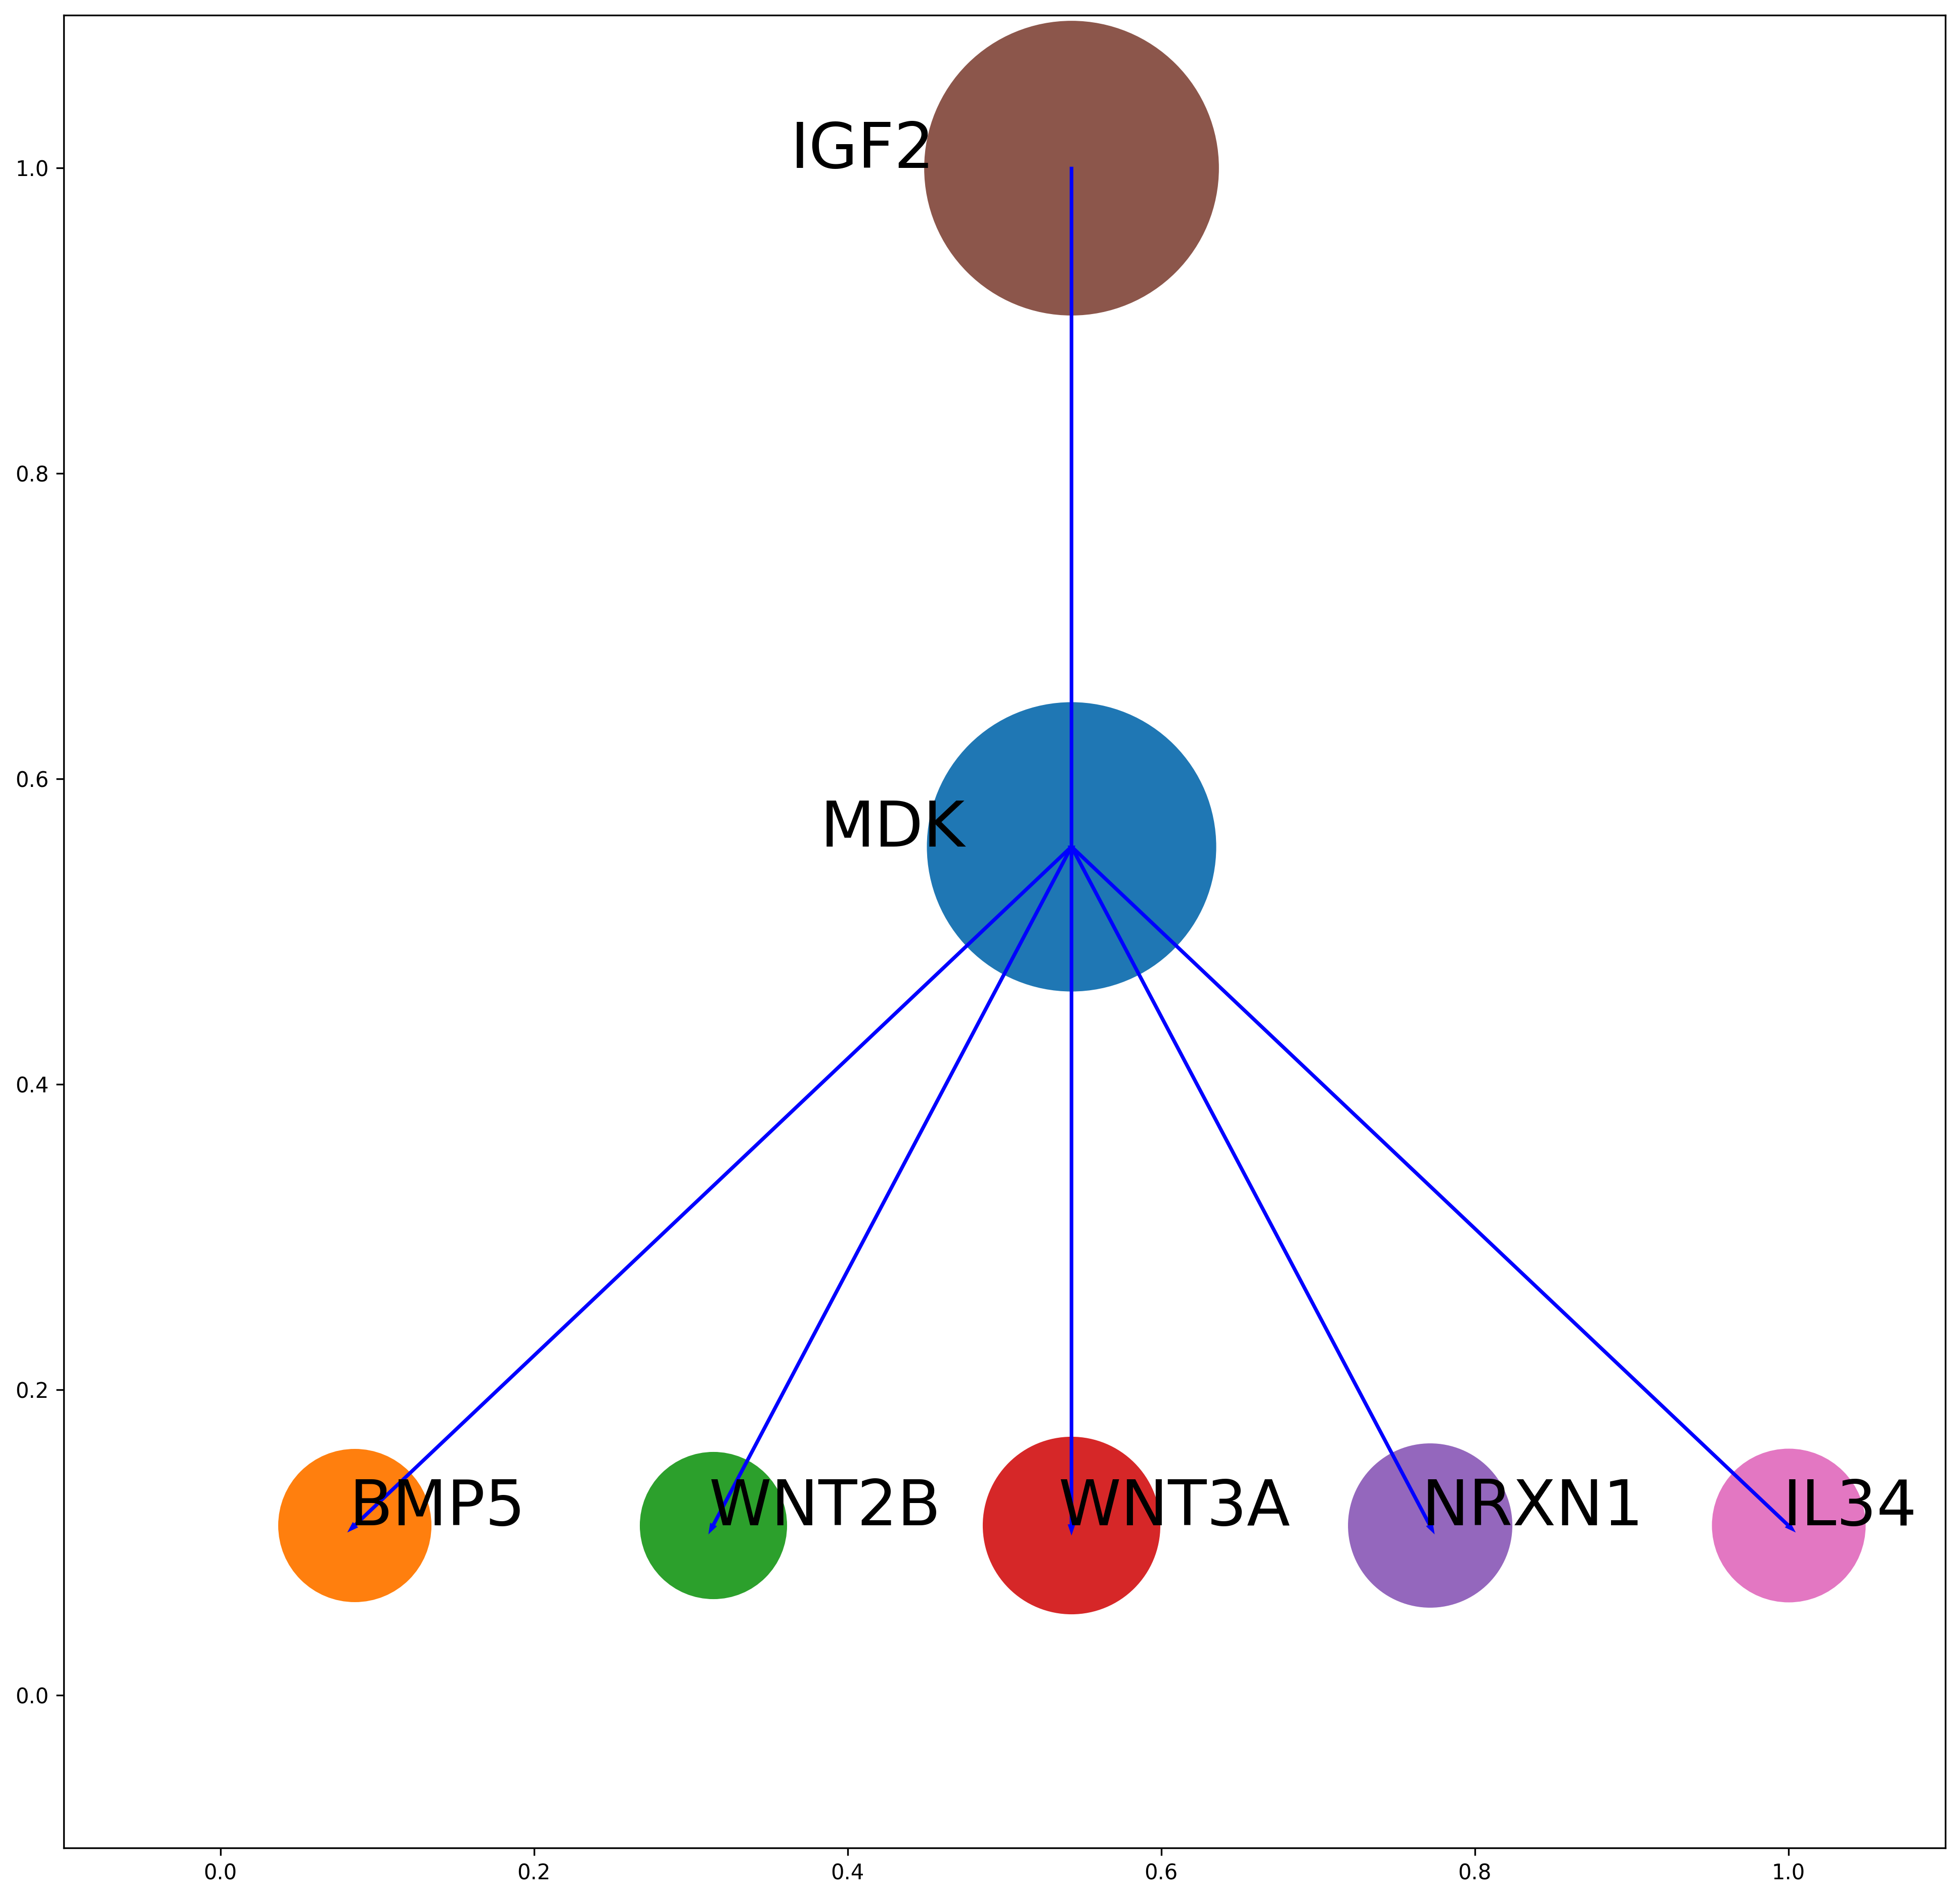

In [48]:
ccT_obj.Draw_MMT(type="l",tree_inds=[1])

### Draw union of trees

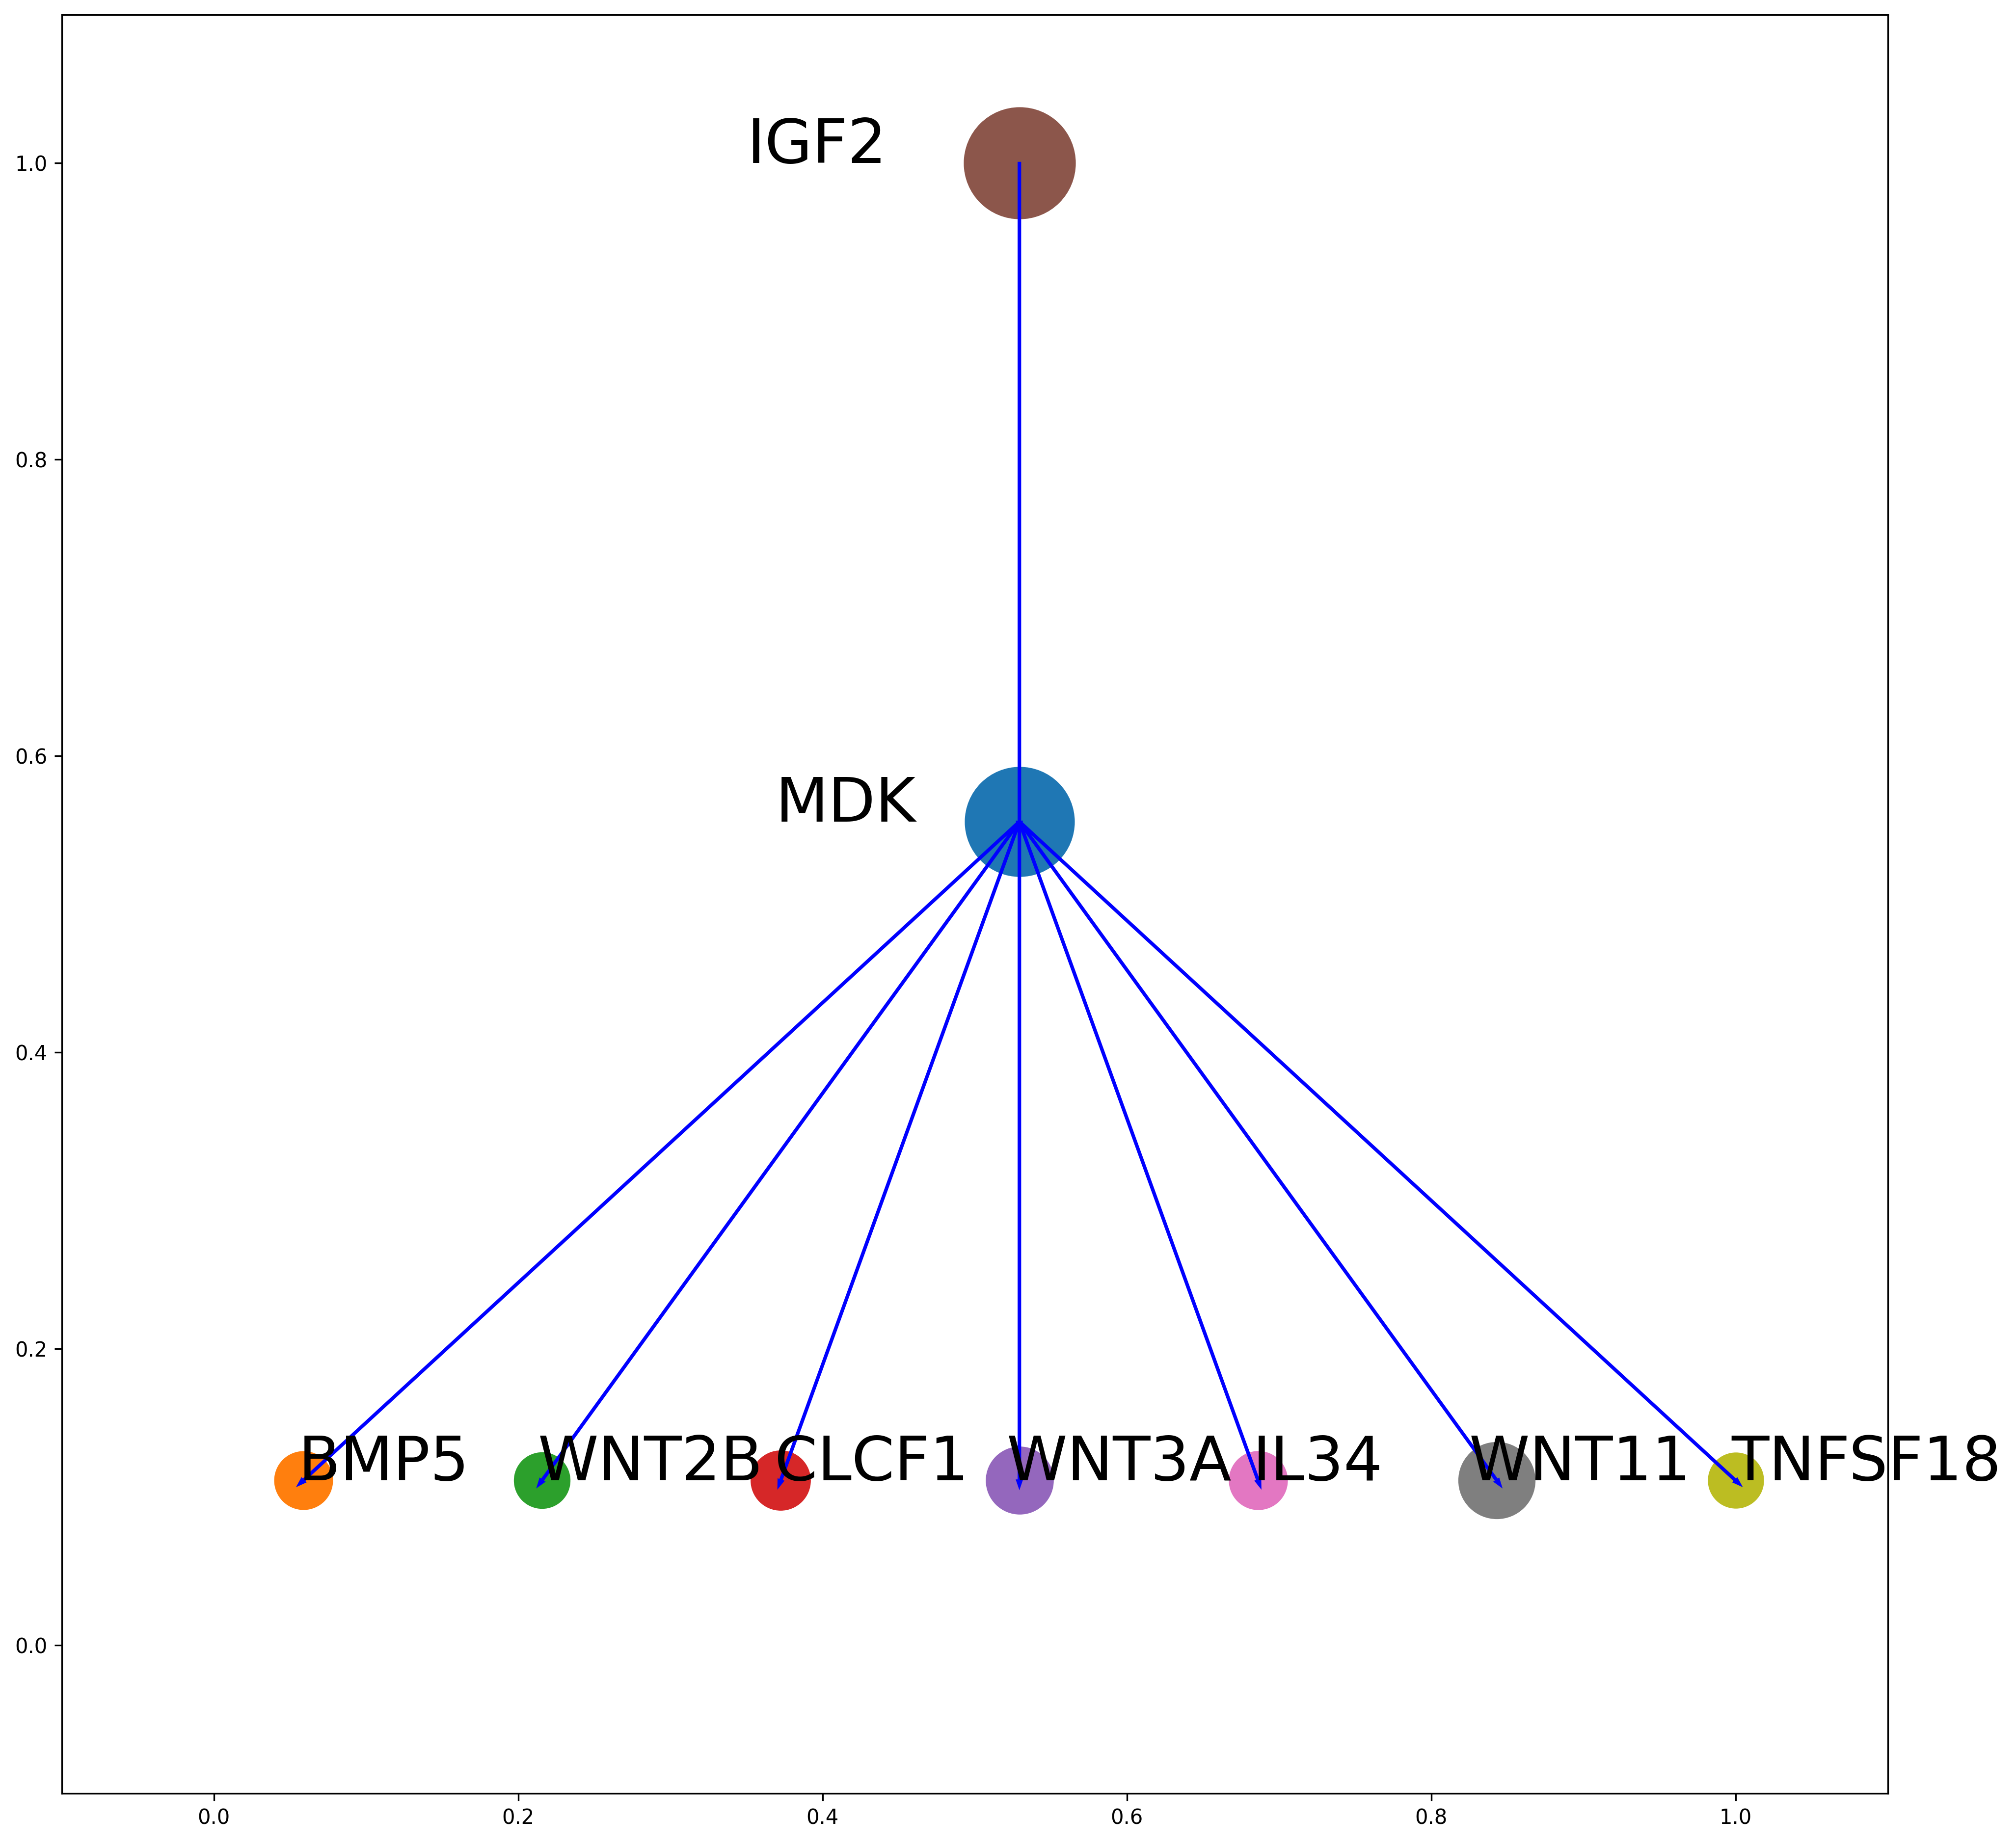

In [49]:
ccT_obj.Draw_big_tree(type='l',tree_inds=[3,5])

### Draw CCC between detected trees of ligands or receptors

0


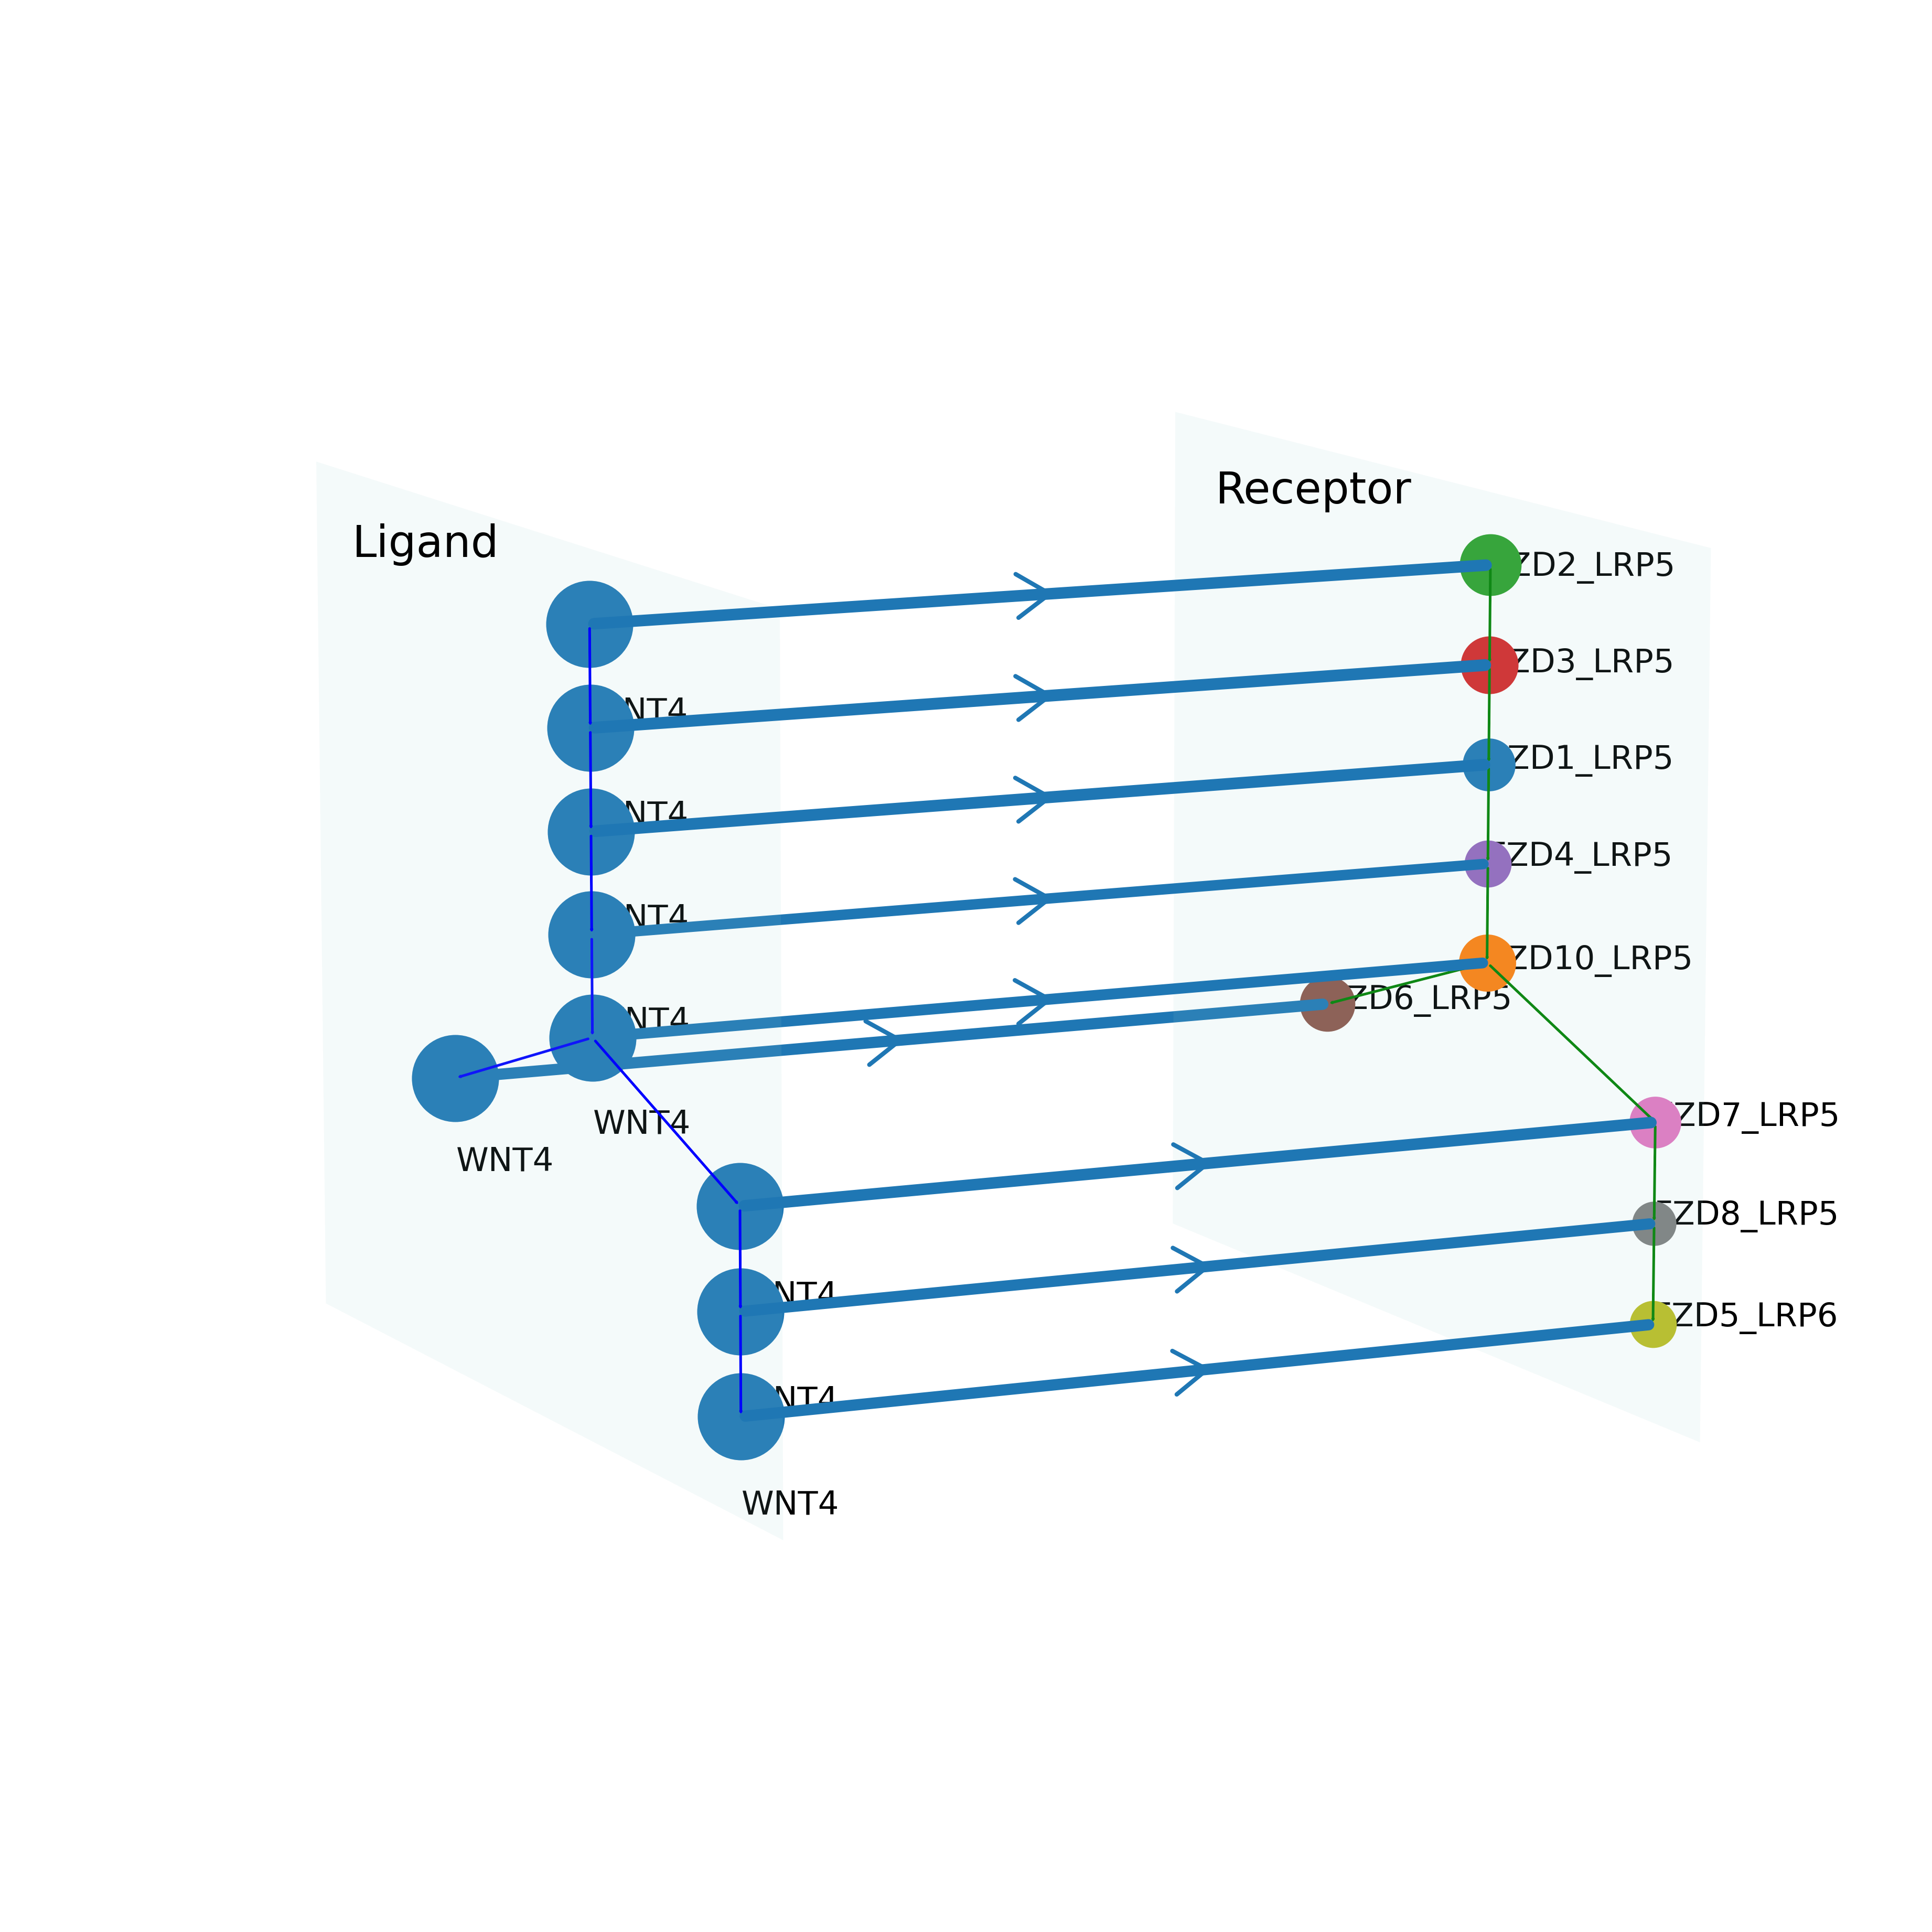

In [50]:
ccT_obj.Draw_MMT_lr_union(tree_inds=[0])

### Draw CCC between interacting ligand tree and receptor tree

[[0, 3, 2], [1, 3, 2], [4, 4, 2], [5, 3, 2], [0, 4, 1], [1, 4, 1], [2, 3, 1], [2, 4, 1], [2, 6, 1], [3, 3, 1], [3, 4, 1], [3, 6, 1], [4, 2, 1], [4, 3, 1], [4, 5, 1], [4, 6, 1], [5, 4, 1], [6, 3, 1], [6, 4, 1], [7, 3, 1], [7, 4, 1], [8, 3, 1], [8, 4, 1], [9, 3, 1], [9, 4, 1]]


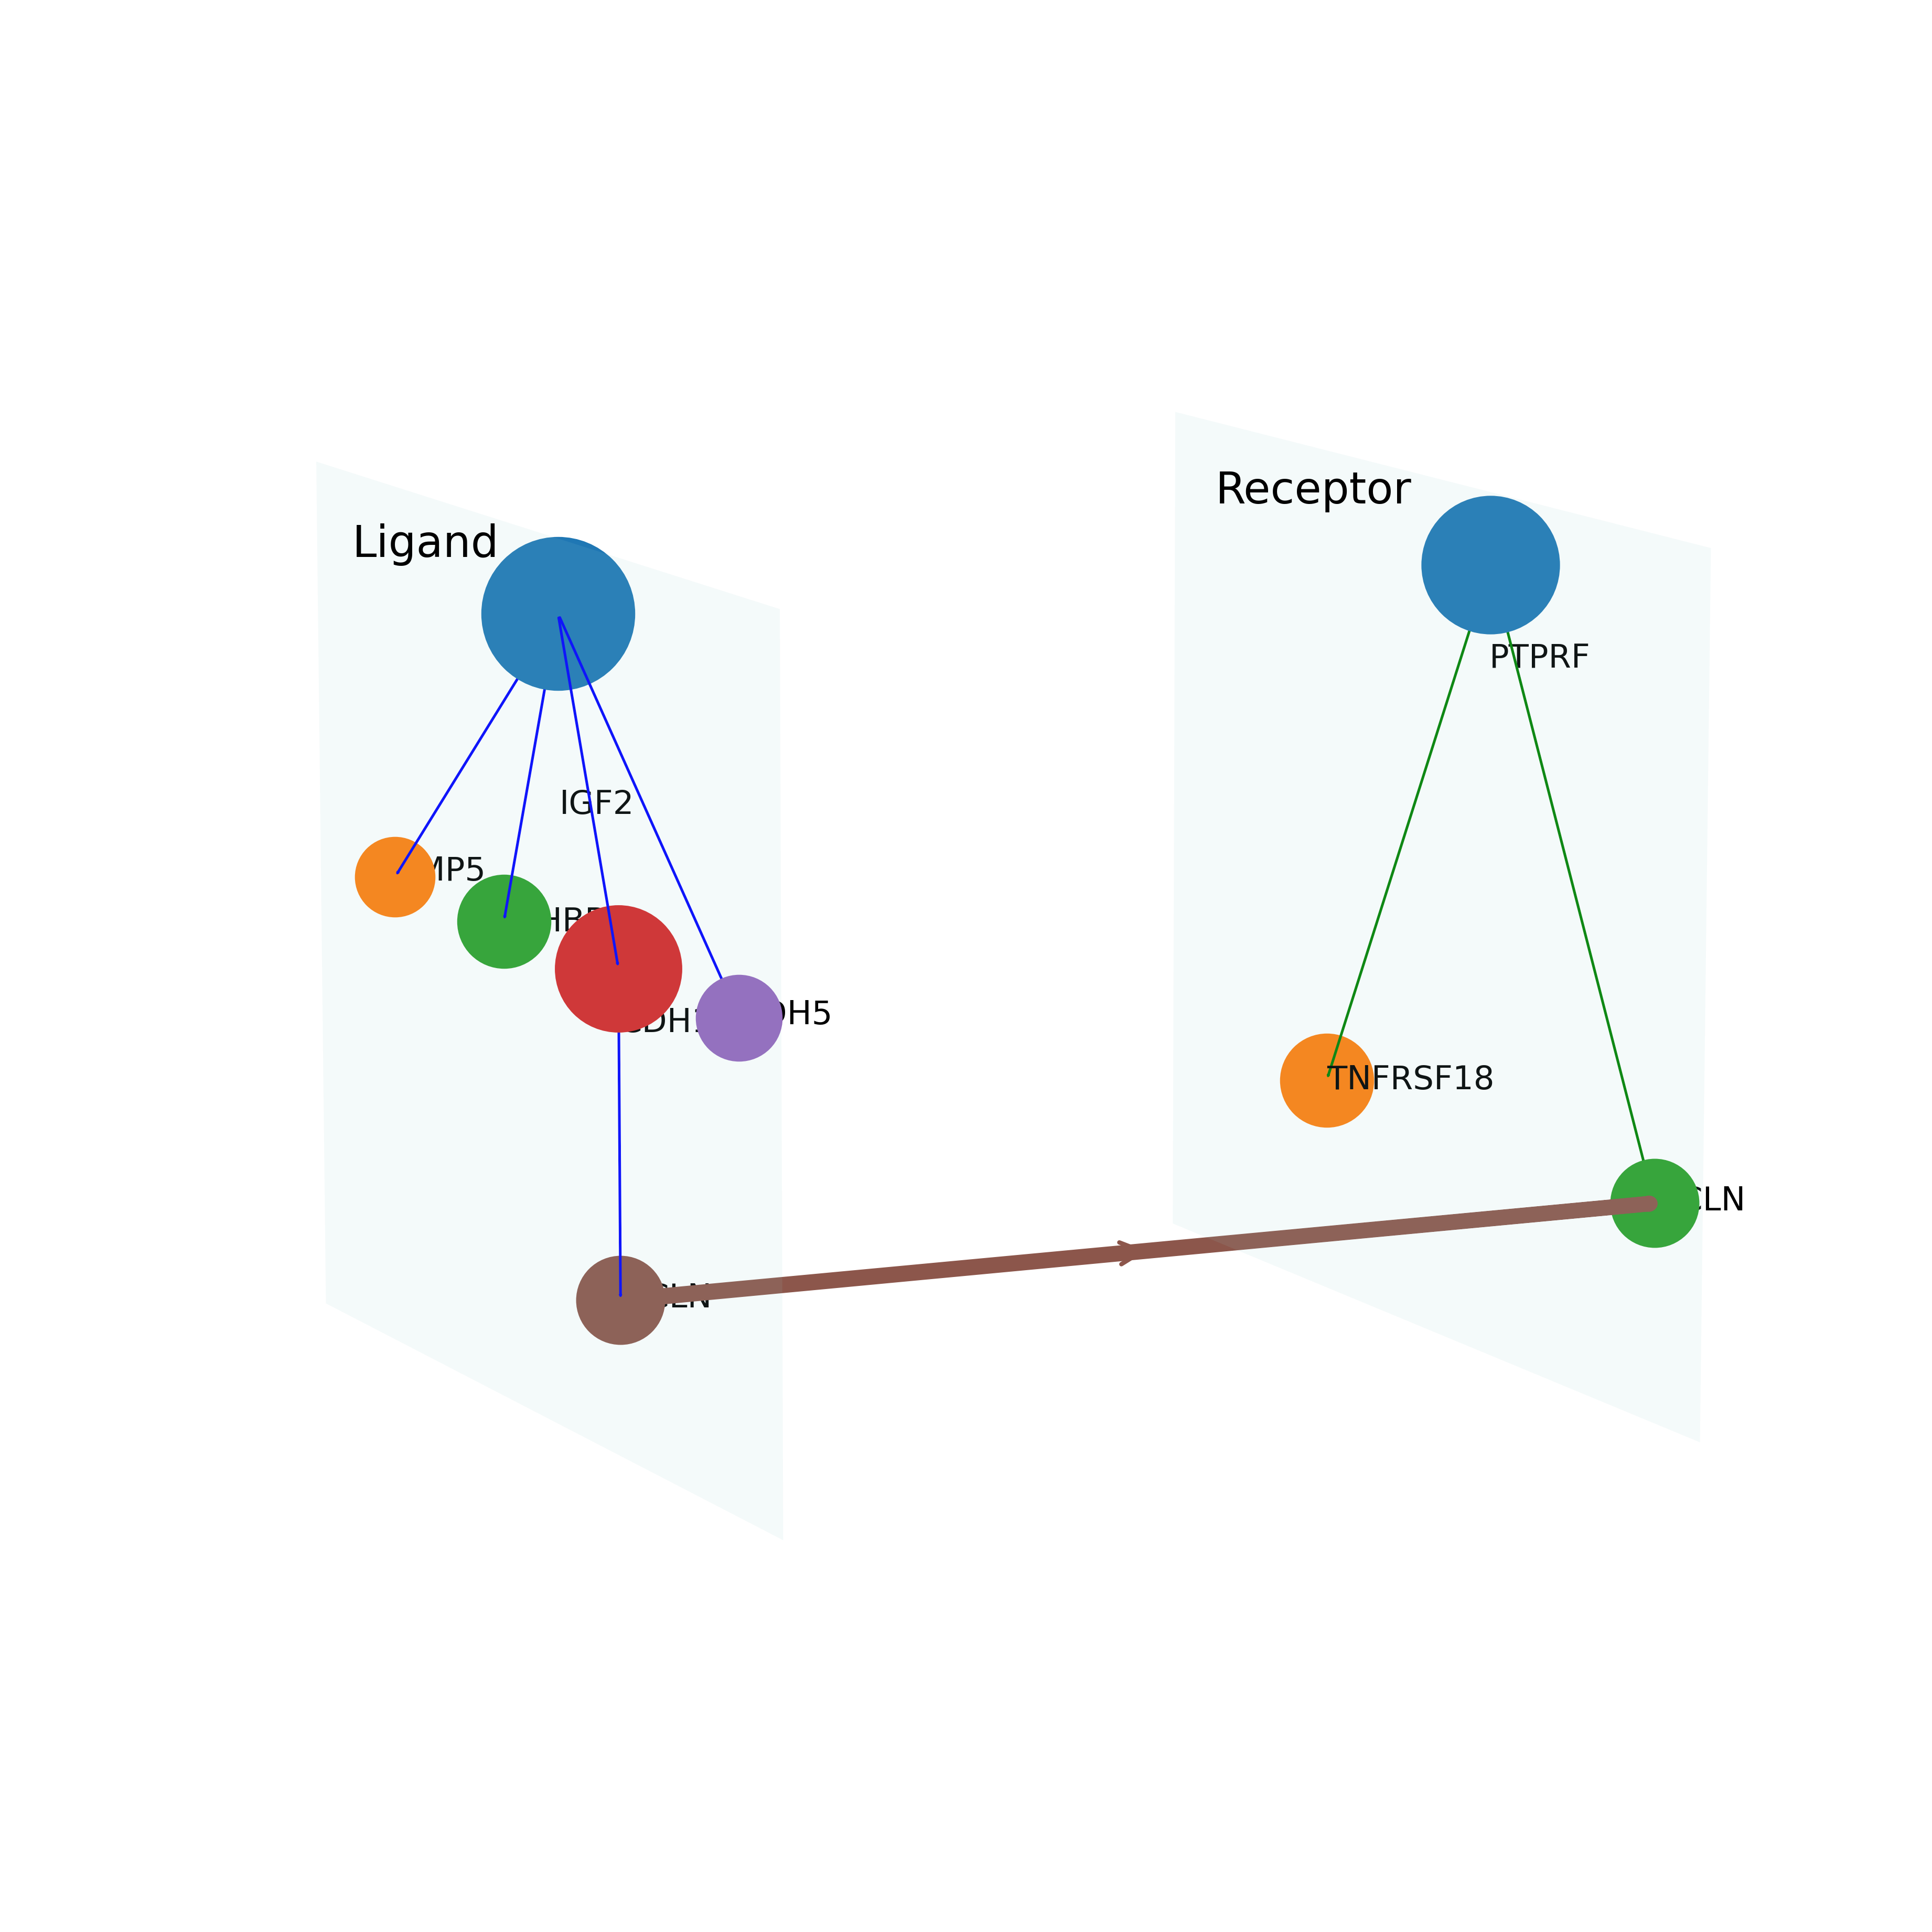

In [51]:
# Obtain the pairs of interacting trees. The last element represents the number of interactions between the trees
interacting_inds = ccT_obj.find_interacting_trees()
print(interacting_inds)
#ccT_obj.Draw_CCC_between_MMT(lr_tree_inds = [[2,3],[3,3],[4,4],[6,3]])
ccT_obj.Draw_CCC_between_MMT(lr_tree_inds = [[4,6]])

### Plot frequency of ligand/receptor occurrence in ligands/receptors trees

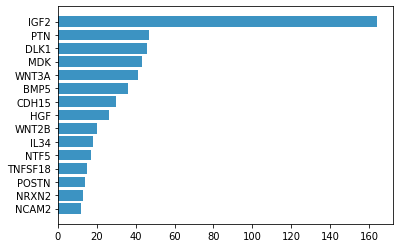

In [52]:
ccT_obj.plot_lr_frequency(type='l')

## CrossChatT on spatial dataset


### Load data and preprocess

In [53]:
adata = sc.read_h5ad('../src/crosschat/data/mouse_wounded_skin_PO7_visium.h5ad')
ccT_obj = cc.CrossChatT(adata,species="mouse")
ccT_obj.prepare_adata(normalize=True, scale=False, input='allgenes')

### Plot annotations in space

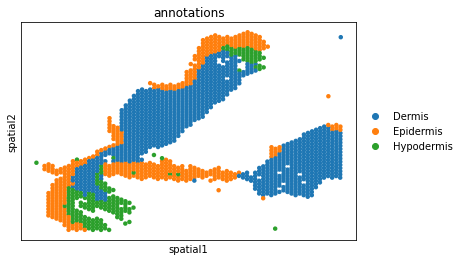

In [54]:
sc.pl.embedding(ccT_obj.adata, basis="spatial",color="annotations")

### Detect trees on spatial data.

Once we detected trees using spatial information, the rest of procedures are similar to those applied to scRNA-seq datasets.

In [55]:
ccT_obj.Detect_trees_S(type="l", tree_size=4, tree_scales=3)
ccT_obj.Detect_trees_S(type="r", tree_size=4, tree_scales=3)
ccT_obj.Detect_trees_S(type="lr_union", inclusive_threshold=0.97, disjoint_threshold=0.97, tree_size=4, tree_scales=3)

0


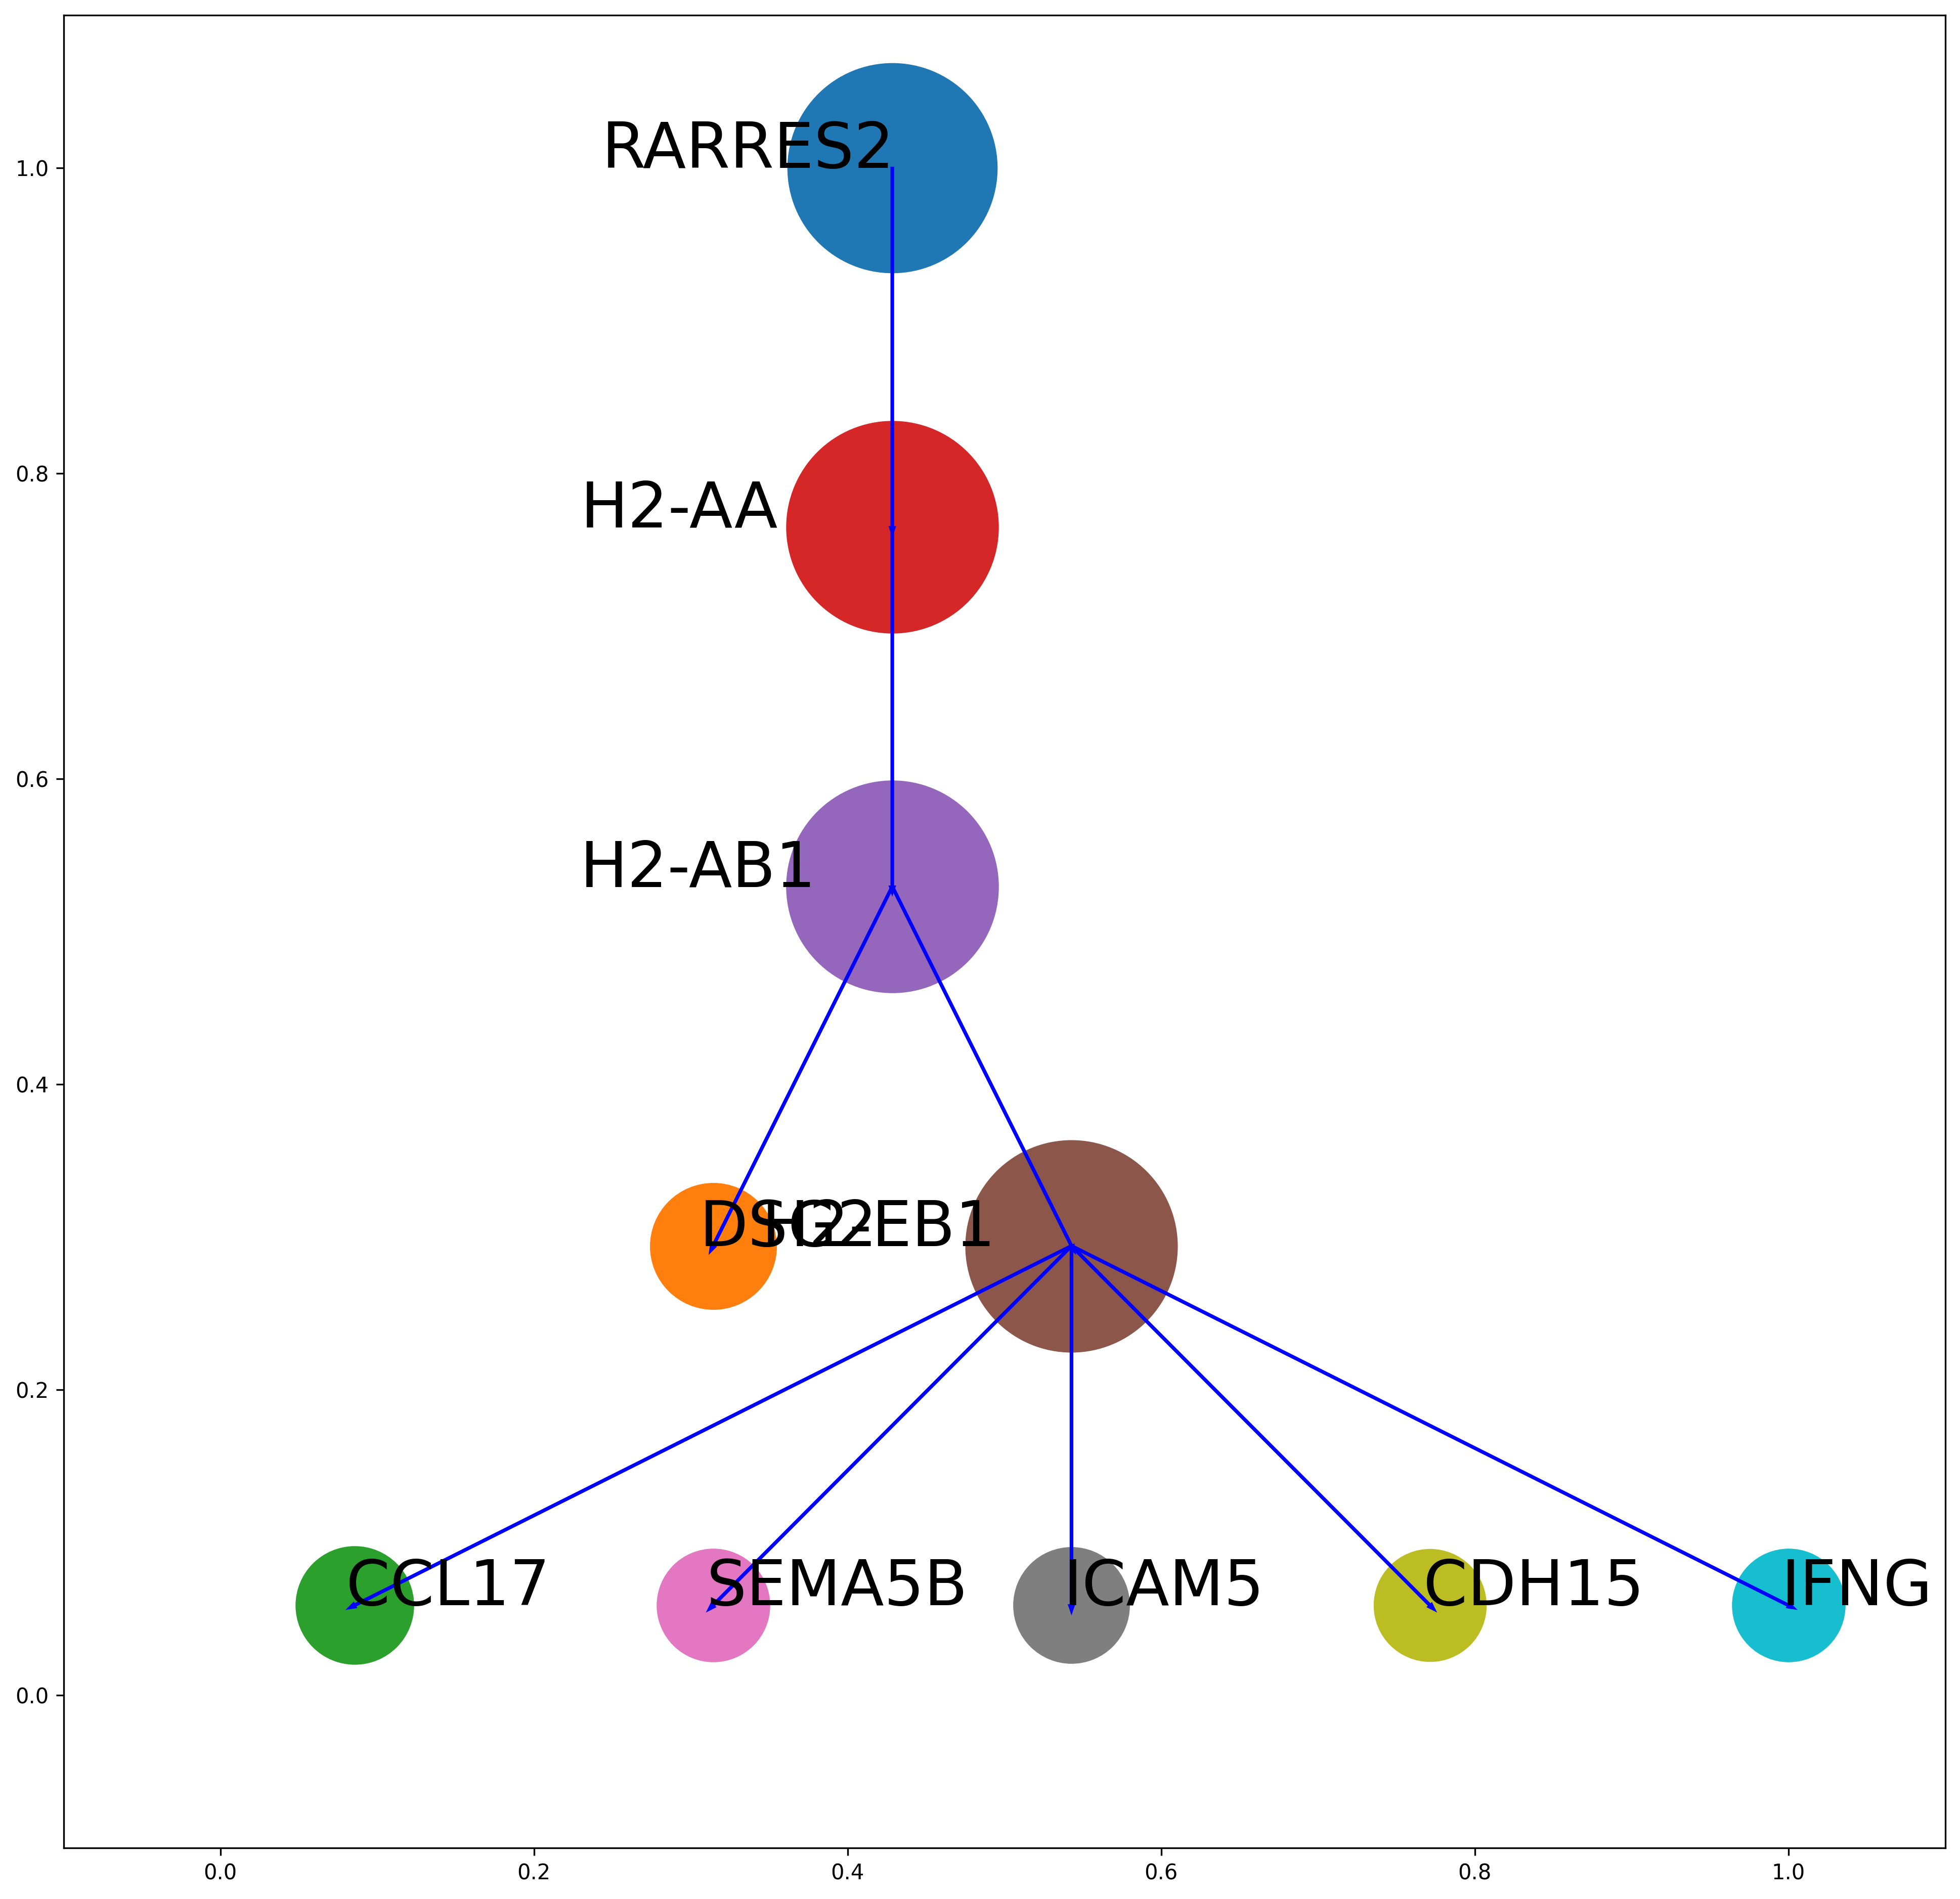

1


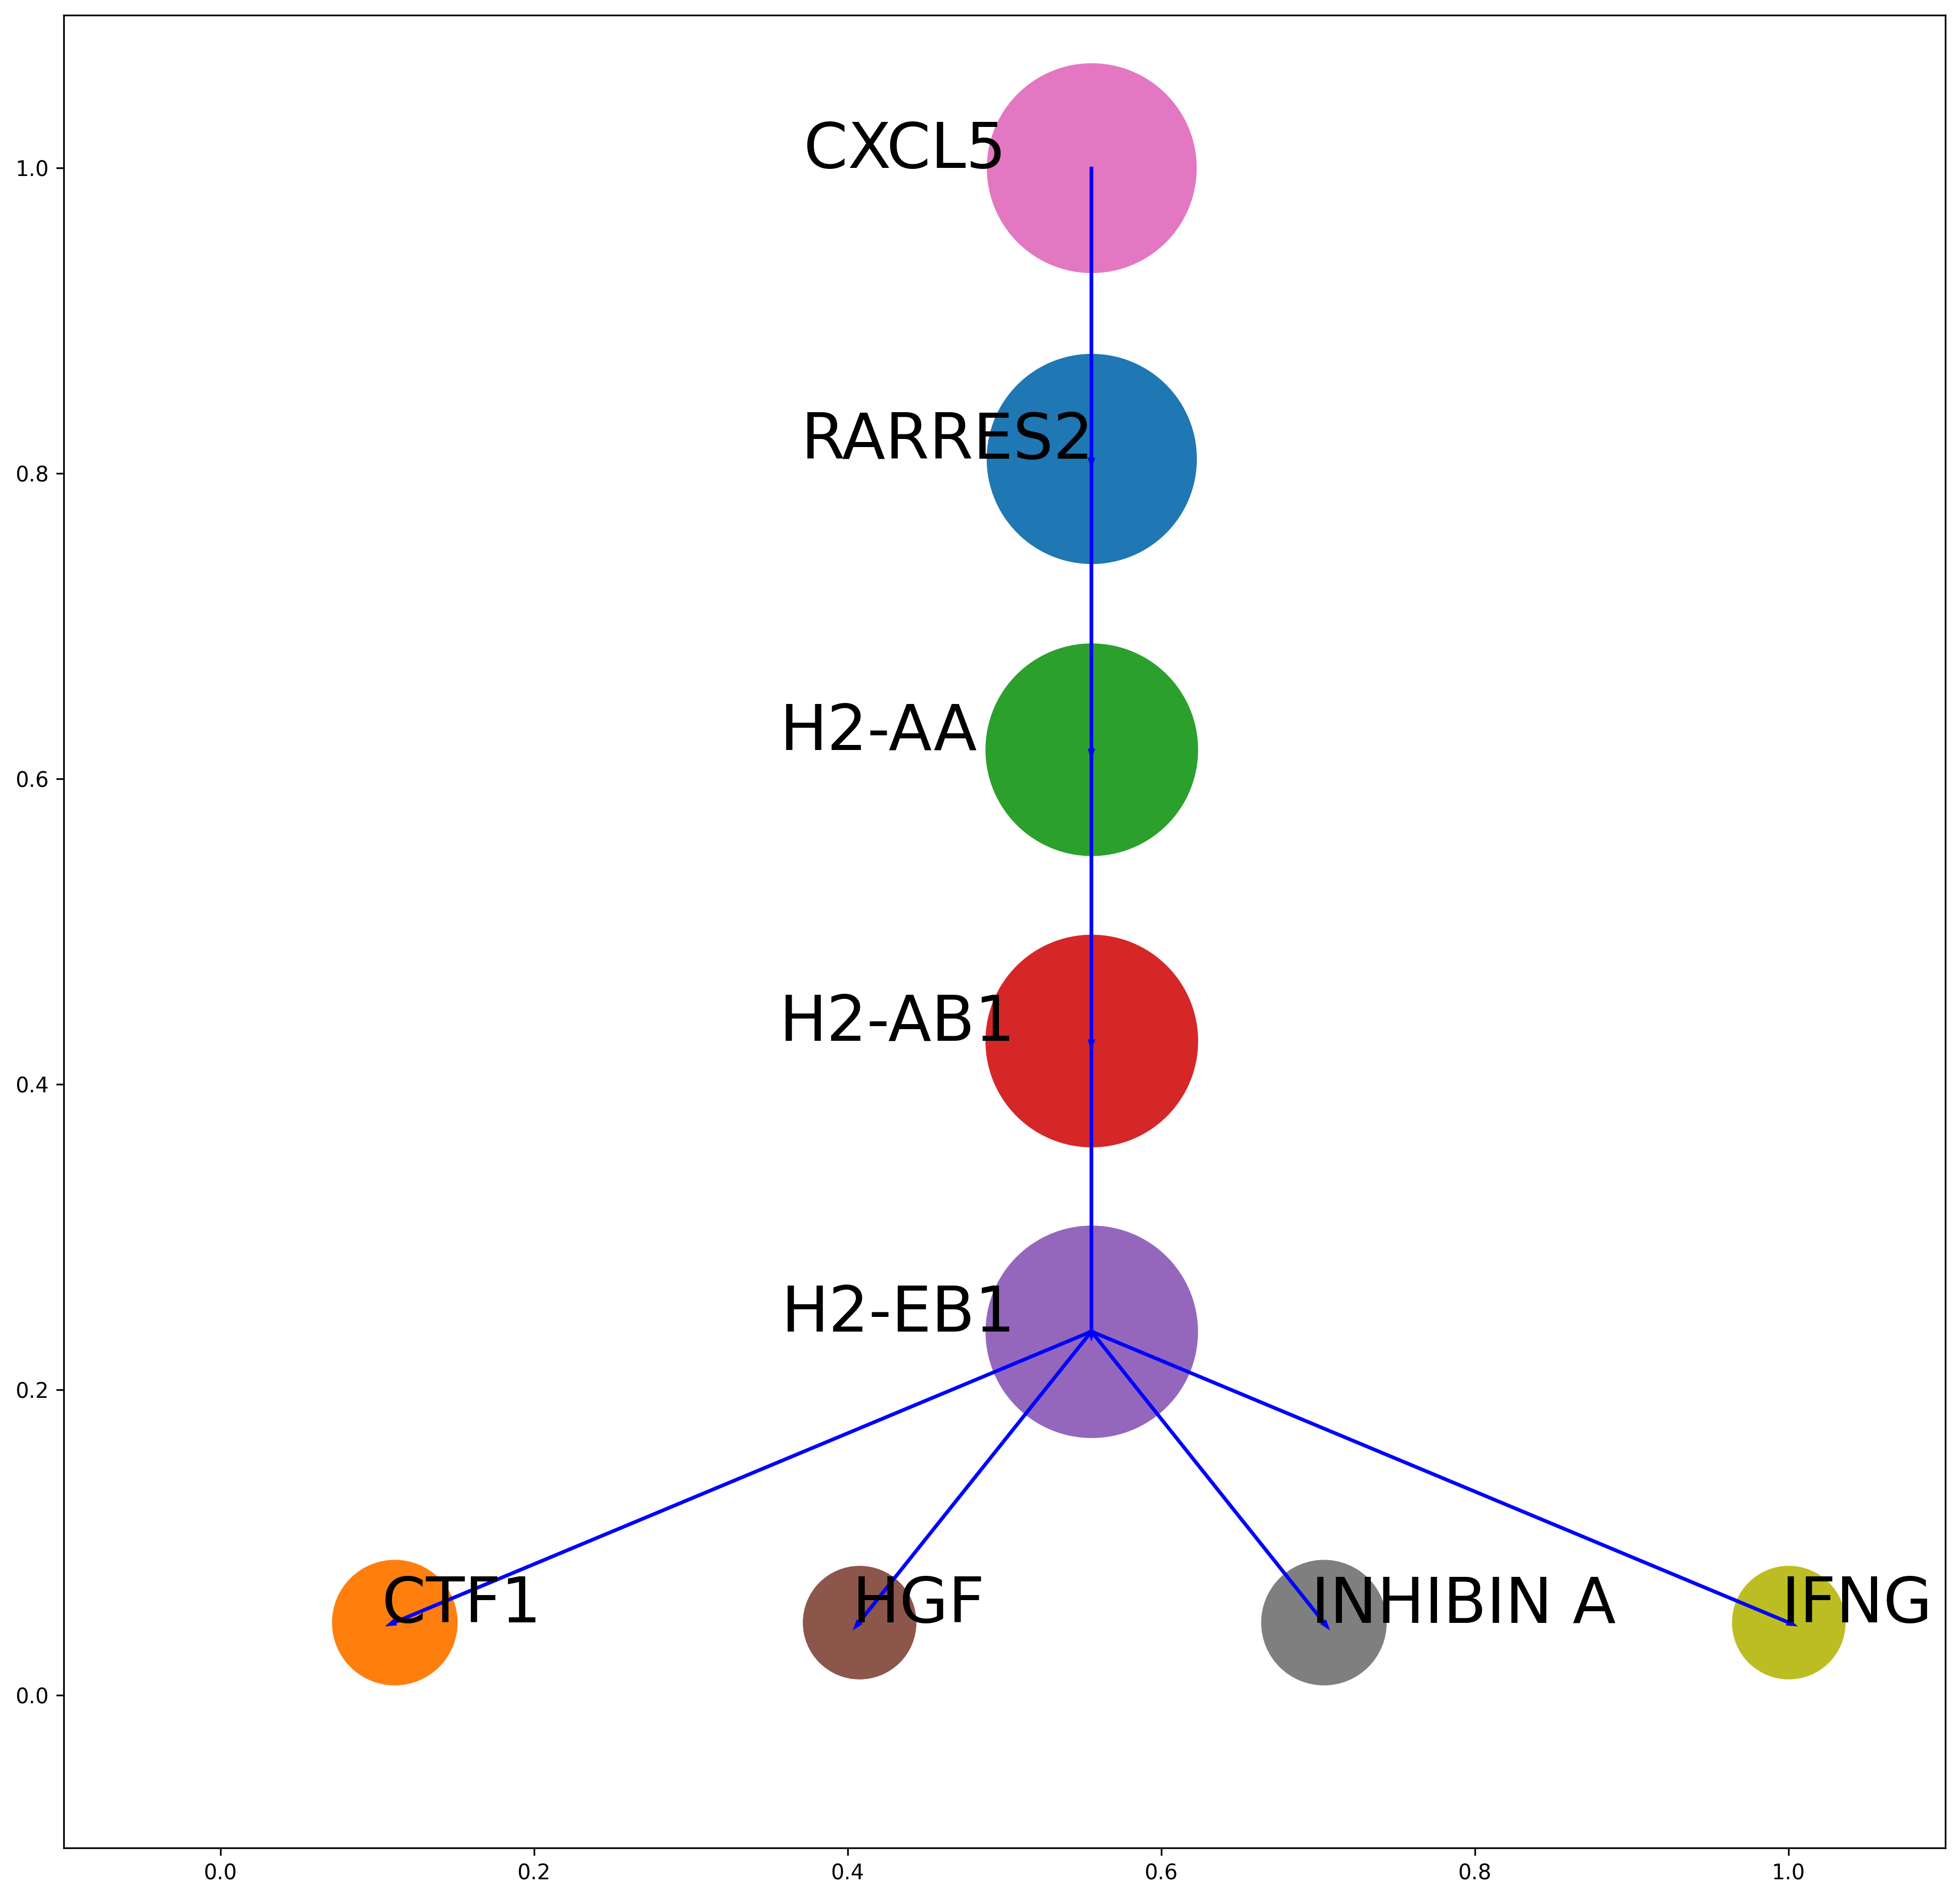

In [56]:
ccT_obj.Draw_MMT(type="l",tree_inds=[0,1],nodesize=10)